# Data Visualizaion Part

step1: import data and showdata

In [1]:
f_handle = open('../public_data/movies_label.name')
label_name = list(map(lambda x:x.strip('\n'),f_handle.readlines()))

In [2]:
%matplotlib inline
from zDataManager import DataManager
input_dir = "../public_data"
output_dir = "../res"
print("Using input_dir: " + input_dir)
print("Using output_dir: " + output_dir)
basename = 'movies'
D = DataManager(basename, input_dir)

/Users/tinkle1129/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using input_dir: ../public_data
Using output_dir: ../res
Info file NOT found : /Users/tinkle1129/Desktop/L2_Salmon-master-2/public_data/movies_public.info
Reading ../public_data/movies_train.data...
Converting {} to correct array
Converting ../public_data/movies_train.data to sparse list
Reading ../public_data/movies_test.data...
Converting {} to correct array
Converting ../public_data/movies_test.data to sparse list
Reading ../public_data/movies_valid.data...
Converting {} to correct array
Converting ../public_data/movies_valid.data to sparse list
Reading ../public_data/movies_train.data...
Converting {} to correct array
Converting ../public_data/movies_train.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading ../public_data/movies_valid.data...
Converting {} to correct array
Converting ../public_data/movies_valid.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr

数据集描述：

多标签分类问题，训练数据有102592维特征，有14种类别，每种类别的取值为0和1

In [3]:
print D

DataManager : movies
info:
	task = multilabel.classification
	valid_num = 3402
	has_categorical = 0
	feat_type = Mixed
	format = sparse
	metric = auc_metric
	target_type = Binary
	test_num = 5105
	label_num = 14
	target_num = 14
	train_num = 25521
	has_missing = 0
	usage = No Info File
	feat_num = 102592
	time_budget = 600
	is_sparse = 1
	name = movies
data:
	X_train = array(25521, 102592)
	Y_train = array(25521, 14)
	X_valid = array(3402, 102592)
	X_test = array(5105, 102592)
feat_type:	array(102592,)
feat_idx:	array(0,)



In [4]:
D.getLabel_name(label_name)  # 导入标签名称
print D.label_name

['drama', 'action', 'adventure', 'animation', 'crime', 'fantasy', 'music', 'musical', 'mystery', 'romance', 'science fiction', 'sport', 'thriller', 'war']


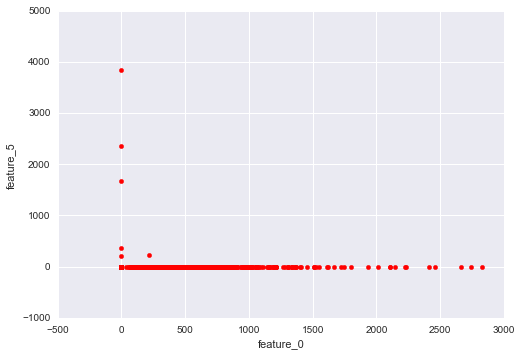

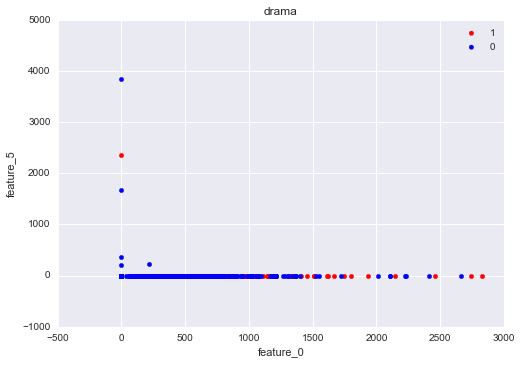

In [5]:
# 原始数据集作图
# 由于movies的数据太大，所以之前不用seaborn包，用原生的包画的scatter）
D.Init_ShowScatter(0,5,'train')
D.Init_ShowScatter(0,5,'train','drama')

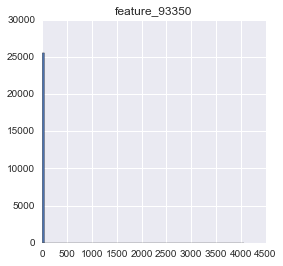

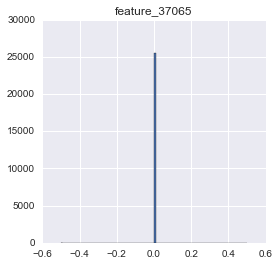

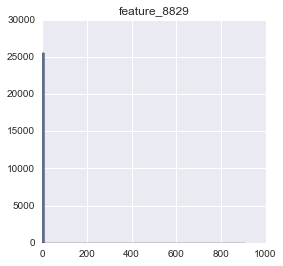

In [6]:
import matplotlib.pyplot as plt
import random
#观察发现特征的内容是非常稀疏的，0值很多
for i in range(3):
    plt.figure(figsize=(4,4))
    idx = random.randint(0,102592)
    feature_0=D.data['X_train'].toarray()[:,idx]
    plt.hist(feature_0,100)
    plt.title('feature_'+str(idx))
    plt.show()

PCA全称为principal component analysis，即主成成分分析，用于降维。

对数据进行降维有很多原因。比如：

1：使得数据更易显示，更易懂

2：降低很多算法的计算开销

3：去除噪声

所以在正式的图可视化前，要对数据进行pca处理

但是由于我们的数据是非常稀疏的（比如X_train,X_test,X_validation都是用稀疏矩阵的形式表示）

稀疏矩阵是一个非常大的矩阵，不能转化为稠密矩阵，否则会报memory error。

那么如何对这个稀疏矩阵进行主成分分析呢？

稀疏矩阵的pca分析，就会用到svd

https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca

In [7]:
from zPreprocessor import Preprocessor
Prepro = Preprocessor()

In [8]:
# Preprocess on the data and load it back into D
D.data['X_train'] = Prepro.fit_transform(D.data['X_train'], D.data['Y_train'])
D.data['X_valid'] = Prepro.transform(D.data['X_valid'])
D.data['X_test'] = Prepro.transform(D.data['X_test'])

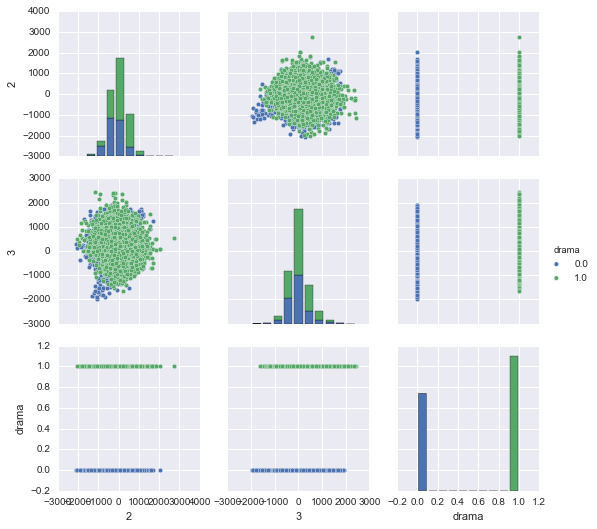

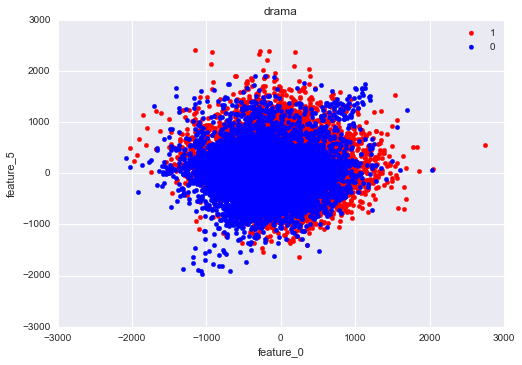

In [9]:
#Scatter plots of variables
#FacetGrid是用于绘制分段数据的条件的地块，主对角线显示了单个变量的数据分布情况，其余则是两两变量之间的相关关系
D.ShowScatter(2, 3, 'train','drama')#用到了seaborn
D.Init_ShowScatter(2,3,'train','drama')#对应上面图4的内容

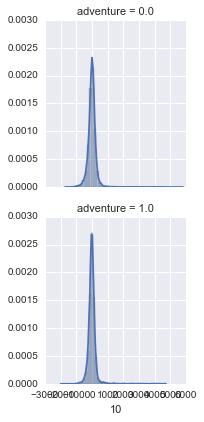

In [10]:
#Histograms of variables and target.
#Kernel Density Estimates，中文译做核密度估计(Wikipedia)，用于解决直方图的表现依赖于其参数的选择的问题
#生成KDE图的方法如下： 为了生成一个KDE，我们把一个核函数--也就是一个平滑的峰值突出的函数--放在每一个数据点的位置上。
#然后，我们把所有核函数的作用效果叠加起来，获得一条光滑的曲线，x轴方向上任意点的效果的叠加都可以算出来。 
#KDE图解决了直方图的两个大问题，一是如果核函数确定，则KDE图是唯一的，不会依赖于人工给出的参数，二是如果核函数是平滑的，则我们给出的KDE图也是平滑的。 
D.ShowDistplot('train',10,'adventure')

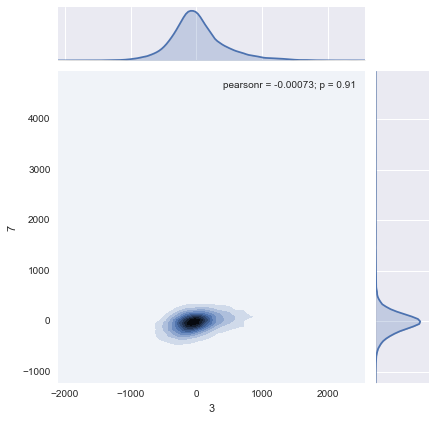

In [11]:
#jointplot 是探究两个变量之间联合分布的工具，对于两个连续型变量的分布情况, 集中趋势能非常简单的给出. 
D.ShowJointplot(3, 7, 'train')

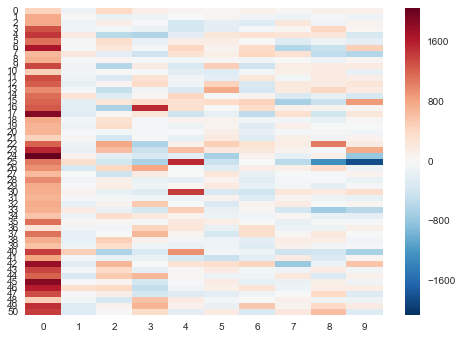

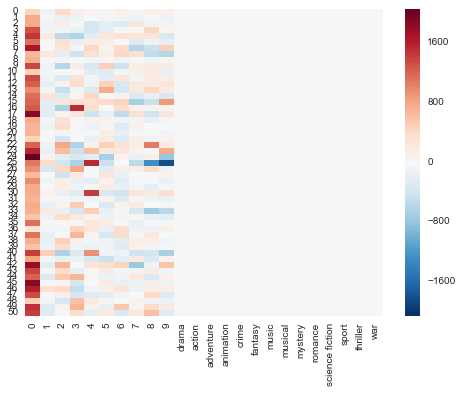

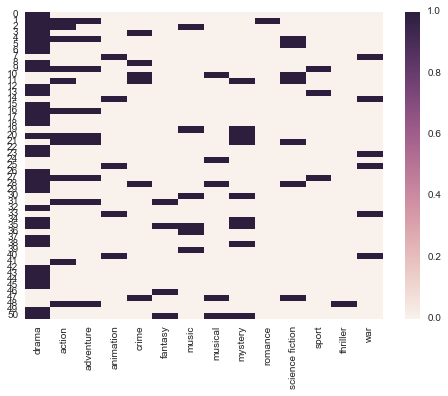

In [14]:
#Heatmap of the data matrix (and target).
#热力图揭示了数据的密集程度，用颜色来表征当前块的值
D.ShowHeatmap('train',range(10))
D.ShowHeatmap('train')
D.ShowHeatmap('train',D.label_name)

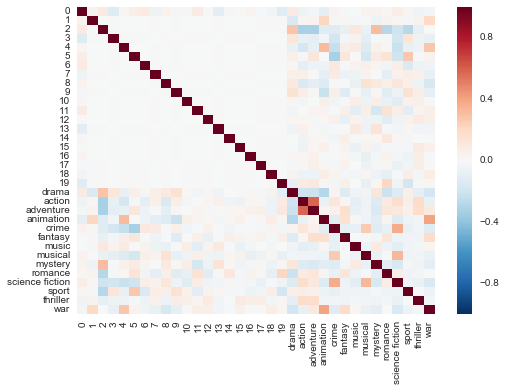

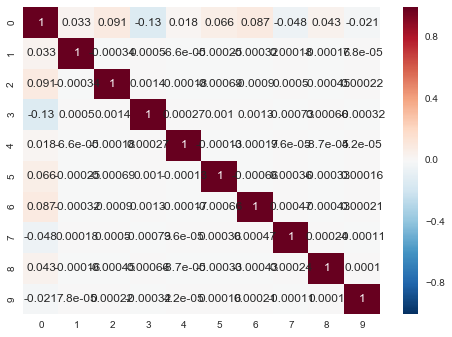

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.032525,0.090871,-0.132990,0.017573,0.066435,0.086601,-0.047613,0.043125,-0.020922
1,0.032525,1.000000,-0.000340,0.000497,-0.000066,-0.000248,-0.000324,0.000178,-0.000161,0.000078
2,0.090871,-0.000340,1.000000,0.001389,-0.000184,-0.000694,-0.000905,0.000497,-0.000451,0.000219
3,-0.132990,0.000497,0.001389,1.000000,0.000269,0.001016,0.001324,-0.000728,0.000659,-0.000320
4,0.017573,-0.000066,-0.000184,0.000269,1.000000,-0.000134,-0.000175,0.000096,-0.000087,0.000042
5,0.066435,-0.000248,-0.000694,0.001016,-0.000134,1.000000,-0.000661,0.000364,-0.000329,0.000160
6,0.086601,-0.000324,-0.000905,0.001324,-0.000175,-0.000661,1.000000,0.000474,-0.000429,0.000208
7,-0.047613,0.000178,0.000497,-0.000728,0.000096,0.000364,0.000474,1.000000,0.000236,-0.000115
8,0.043125,-0.000161,-0.000451,0.000659,-0.000087,-0.000329,-0.000429,0.000236,1.000000,0.000104
9,-0.020922,0.000078,0.000219,-0.000320,0.000042,0.000160,0.000208,-0.000115,0.000104,1.000000


In [32]:
#Heatmap of the variable correlation matrix.
#可以看出降维后，新的10维特征之间的相关性很小
D.ShowCorrcoefHeatmap('train')
import seaborn as sns
DF = D.toDF('train')
corr = DF.ix[:,range(10)].corr(method='pearson', min_periods=1)
sns.heatmap(corr,annot=True)
sns.plt.show()
corr

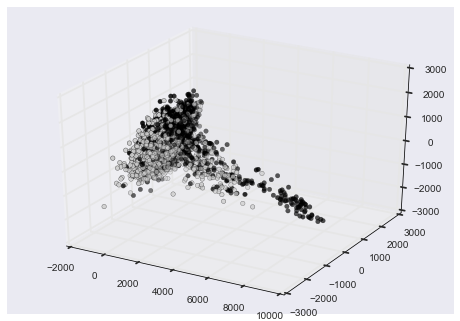

In [46]:
D.ShowJointGrid_PCA(3, 'train','drama')

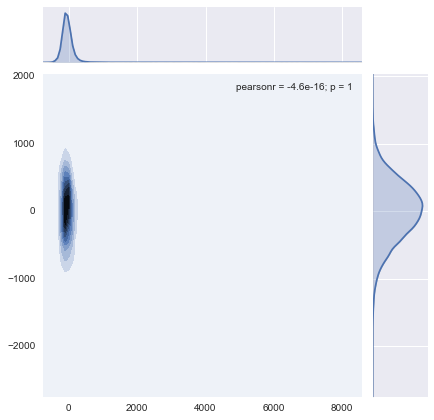

In [43]:
D.ShowJointPlot_PCA('train')

结论：

pca的意义：

多变量大样本无疑会为研究和应用提供了丰富的信息，但也在一定程度上增加了数据采集的工作量，更重要的是在多数情况下，许多变量之间可能存在相关性，从而增加了问题分析的复杂性，同时对分析带来不便。如果分别对每个指标进行分析，分析往往是孤立的，而不是综合的。盲目减少指标会损失很多信息，容易产生错误的结论。

因此需要找到一个合理的方法，在减少需要分析的指标同时，尽量减少原指标包含信息的损失，以达到对所收集数据进行全面分析的目的。由于各变量间存在一定的相关关系，因此有可能用较少的综合指标分别综合存在于各变量中的各类信息。pca就属于这样的方法

要剔除的特征主要是和类标签无关的特征。而这里的特征很多是和类标签有关的，但里面存在噪声或者冗余。在这种情况下，需要一种特征降维的方法来减少特征数，减少噪音和冗余，减少过度拟合的可能性。

PCA的思想是将n维特征映射到k维上,这k维特征称为主成分，是重新构造出来的k维特征，而不是简单地从n维特征中去除其余n-k维特征。

PCA将n个特征降维到k个，可以用来进行数据压缩，生成的新的特征两两之间的相关性很小